# DS4D 2021 clevercogs Entertainment

Designer&data Analysts: Haonan WANG s2087188

In my group, we assigned the data from data holder to the groupmembers based on the different time phases of UK lockdown history. I am going to analyse data from two lockdown periods (3/23/2020-7/24/2020) & (1/6/2021-3/8/2021).

REF:Baker, C., Kirk-Wade, E., Brown, J. and Barber, S., 2021. Coronavirus: A history of English lockdown laws. [online] House of Commons Library. Available at: <https://commonslibrary.parliament.uk/research-briefings/cbp-9068/> [Accessed 10 November 2021].

We obtained three datasets from dataholder. After assigning them according to the time period, I got a total of three datasets in tabular form. 

In [1]:
import pandas as pd 
import numpy as np
data1 = pd.read_csv('CCDate_3.23.2020-07.24.2020_01.06.2021- 03.08.2021.csv') #data1 is the user beahviour dataset
data2 = pd.read_csv('Users2021.csv') # data2 is the dataset of the basic information on all users of the platform up to 2021
data3 = pd.read_csv('CustomerMedicalConditions04Nov21.csv') # data3 is the dataset of all users's health conditons and other information

How many rows in the original data set1'CCDate_3.23.2020-07.24.2020_01.06.2021- 03.08.2021.csv'?

In [2]:
data1.shape[0]

94459

How many rows in the original data set2'Users2021.csv'?

In [3]:
data2.shape[0]

3641

How many rows in the original data set3'CustomerMedicalConditions04Nov21.csv'?

In [4]:
data3.shape[0]

1311

# 1.CLEAN DATA Round1

1.1 It was observed that the three tables could be merged together using 'ExternalID' as an index. So I need to clean out the null values in 'ExternalID'. (If I don't clean it, the Python will crash frequently）

In [5]:
data1.dropna(axis = 0, subset = ['ExternalID'],inplace= True)
# use dropna to rmove MULL value in the column of 'ExternalID' from 'data1'
data2.dropna(axis = 0, subset = ['ExternalID'],inplace= True)
# use dropna to rmove MULL value in the column of 'ExternalID' from 'data2'
data3.dropna(axis = 0, subset = ['ExternalID'],inplace= True)
# use dropna to rmove MULL value in the column of 'ExternalID' from 'data3'
print(data1.head()) # check details
data1.shape[0] # See how many rows of data are clear

              Time                             VisitorID  ExternalID  Role  \
1  3/7/21 11:49 PM  BE0BBD31-93F4-44FE-82EC-24E68BEAD418      7901.0  User   
2  3/7/21 11:49 PM  BE0BBD31-93F4-44FE-82EC-24E68BEAD418      7901.0  User   
3  3/7/21 11:45 PM  6E9B4B68-00B4-4680-AD55-723EF4AB38B6      9080.0  User   
4  3/7/21 11:45 PM  6E9B4B68-00B4-4680-AD55-723EF4AB38B6      9080.0  User   
5  3/7/21 11:45 PM  6E9B4B68-00B4-4680-AD55-723EF4AB38B6      9080.0  User   

            Location     Link Title Link  Type ContentInfo  \
1       Aberdeen C@H      Online TV   Category         NaN   
2       Aberdeen C@H  Entertainment   Category         NaN   
3  Responder Service        YouTube   Internet         NaN   
4  Responder Service         Videos   Category         NaN   
5  Responder Service  Entertainment   Category         NaN   

                       URL  
1                      NaN  
2                      NaN  
3  http://www.youtube.com/  
4                      NaN  
5            

76391

# 2.Merge Round1

2.1 After cleaning the first time and discovering the all data sets, i want to use information based on data1 and data2 .So I need to merge data1 and data2 in to a new data set by using index 'ExternalID'.After that, I would only need to remove data in this new data set.

In [6]:
### The merged new dataset is called ;newdata1'
newdata1 = pd.merge(data1,data2,how="left", on=["ExternalID"])
newdata1 # the new merged data set

,Time,VisitorID_x,ExternalID,Role,Location_x,Link Title,Link Type,ContentInfo,URL,User ID,VisitorID_y,Birth date,Gender1,Location_y
0,3/7/21 11:49 PM,BE0BBD31-93F4-44FE-82EC-24E68BEAD418,7901.0,User,Aberdeen C@H,Online TV,Category,NaN,NaN,2541,CC9224B6-7CDE-4EDD-81B4-F20017E6F497,3/12/51 12:00 AM,Male,National/North/Aberdeen City Council/Raeden Ca...
1,3/7/21 11:49 PM,BE0BBD31-93F4-44FE-82EC-24E68BEAD418,7901.0,User,Aberdeen C@H,Entertainment,Category,NaN,NaN,2541,CC9224B6-7CDE-4EDD-81B4-F20017E6F497,3/12/51 12:00 AM,Male,National/North/Aberdeen City Council/Raeden Ca...
2,3/7/21 11:45 PM,6E9B4B68-00B4-4680-AD55-723EF4AB38B6,9080.0,User,Responder Service,YouTube,Internet,NaN,http://www.youtube.com/,5067,4ED07848-D9C0-48CC-96CF-619CA8CCE840,2/3/89 12:00 AM,Male,National/EAST /Edinburgh City Council/Responde...
3,3/7/21 11:45 PM,6E9B4B68-00B4-4680-AD55-723EF4AB38B6,9080.0,User,Responder Service,Videos,Category,NaN,NaN,5067,4ED07848-D9C0-48CC-96CF-619CA8CCE840,2/3/89 12:00 AM,Male,National/EAST /Edinburgh City Council/Responde...
4,3/7/21 11:45 PM,6E9B4B68-00B4-4680-AD55-723EF4AB38B6,9080.0,User,Responder Service,Entertainment,Category,NaN,NaN,5067,4ED07848-D9C0-48CC-96CF-619CA8CCE840,2/3/89 12:00 AM,Male,National/EAST /Edinburgh City Council/Responde...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76386,3/23/20 12:02 AM,112FA96F-1BD2-4673-BFE8-ADF5478493D3,5535.0,User,St Leonards Court,Family & Friends,Internet,NaN,contacts.asp,1416,E87F7029-5A43-4DF4-A513-1E35EF2936CB,11/25/55 12:00 AM,Female,National/WEST /South Ayrshire Council/South Ay...
76387,3/23/20 12:02 AM,112FA96F-1BD2-4673-BFE8-ADF5478493D3,5535.0,User,St Leonards Court,NHS Inform - Coronavirus,Internet,NaN,https://www.nhsinform.scot/illnesses-and-condi...,1416,E87F7029-5A43-4DF4-A513-1E35EF2936CB,11/25/55 12:00 AM,Female,National/WEST /South Ayrshire Council/South Ay...
76388,3/23/20 12:01 AM,112FA96F-1BD2-4673-BFE8-ADF5478493D3,5535.0,User,St Leonards Court,Email,Internet,NaN,email.asp?,1416,E87F7029-5A43-4DF4-A513-1E35EF2936CB,11/25/55 12:00 AM,Female,National/WEST /South Ayrshire Council/South Ay...
76389,3/23/20 12:00 AM,112FA96F-1BD2-4673-BFE8-ADF5478493D3,5535.0,User,St Leonards Court,Family & Friends,Internet,NaN,contacts.asp,1416,E87F7029-5A43-4DF4-A513-1E35EF2936CB,11/25/55 12:00 AM,Female,National/WEST /South Ayrshire Council/South Ay...


# 3.CLEAN DATA Round 2

3.1 According to Dataholder_Lynda, all users without a date of birth and under the age of 18 are probably not individual users and mostly use shared machines, so they need to be removed.

3.2 Clean Method: Firstly, Find how many users are under 18 years old and their ExternalID. Secondly, use their ExternalID to remove data from new merged data set or the original data sets.

In [7]:
data3.loc[data3['Age']<18]
# Data3 provide the users' age number, so I can use it.
# use dataset 3 to find how many users are under 18 years old. Then remove all these users from all THREE datasets through their 'ExternalID'

,ExternalID,CleverCogsUserId,Gender2,DateOfBirth,Age,StaffPlanConditions,CareSysCondition
62,4777,1139,M,2016/1/1,5.0,NaN,NaN
369,5749,1598,F,2017/4/18,4.0,NaN,Multiple Sclerosis
408,5825,1801,F,2017/6/19,4.0,NaN,NaN
556,6249,2347,F,2014/10/10,7.0,NaN,NaN
646,7860,2500,U,2018/7/19,3.0,NaN,NaN
655,7882,2522,U,2014/1/31,7.0,NaN,NaN
661,7889,2529,U,2018/7/16,3.0,NaN,NaN


3.3 I have got the ExternalID under 18. So I can remove thir information in the new dataset 'newdata1'.

In [8]:
# Remove the information of users under 18 years old by using their 'ExternalID' in 'New' dataset- newdata1
newdata1.drop(newdata1[newdata1.ExternalID==4777].index,inplace= True) #Remove all usage data for this user from dataset1 through ExternalID=4777
newdata1.drop(newdata1[newdata1.ExternalID==5749].index,inplace= True) #Remove all usage data for this user from dataset1 through ExternalID=5749
newdata1.drop(newdata1[newdata1.ExternalID==5825].index,inplace= True) #Remove all usage data for this user from dataset1 through ExternalID=5825
newdata1.drop(newdata1[newdata1.ExternalID==6249].index,inplace= True) #Remove all usage data for this user from dataset1 through ExternalID=6249
newdata1.drop(newdata1[newdata1.ExternalID==7860].index,inplace= True) #Remove all usage data for this user from dataset1 through ExternalID=7860
newdata1.drop(newdata1[newdata1.ExternalID==7882].index,inplace= True) #Remove all usage data for this user from dataset1 through ExternalID=7882
newdata1.drop(newdata1[newdata1.ExternalID==7889].index,inplace= True) #Remove all usage data for this user from dataset1 through ExternalID=7889
newdata1 # check row number

,Time,VisitorID_x,ExternalID,Role,Location_x,Link Title,Link Type,ContentInfo,URL,User ID,VisitorID_y,Birth date,Gender1,Location_y
0,3/7/21 11:49 PM,BE0BBD31-93F4-44FE-82EC-24E68BEAD418,7901.0,User,Aberdeen C@H,Online TV,Category,NaN,NaN,2541,CC9224B6-7CDE-4EDD-81B4-F20017E6F497,3/12/51 12:00 AM,Male,National/North/Aberdeen City Council/Raeden Ca...
1,3/7/21 11:49 PM,BE0BBD31-93F4-44FE-82EC-24E68BEAD418,7901.0,User,Aberdeen C@H,Entertainment,Category,NaN,NaN,2541,CC9224B6-7CDE-4EDD-81B4-F20017E6F497,3/12/51 12:00 AM,Male,National/North/Aberdeen City Council/Raeden Ca...
2,3/7/21 11:45 PM,6E9B4B68-00B4-4680-AD55-723EF4AB38B6,9080.0,User,Responder Service,YouTube,Internet,NaN,http://www.youtube.com/,5067,4ED07848-D9C0-48CC-96CF-619CA8CCE840,2/3/89 12:00 AM,Male,National/EAST /Edinburgh City Council/Responde...
3,3/7/21 11:45 PM,6E9B4B68-00B4-4680-AD55-723EF4AB38B6,9080.0,User,Responder Service,Videos,Category,NaN,NaN,5067,4ED07848-D9C0-48CC-96CF-619CA8CCE840,2/3/89 12:00 AM,Male,National/EAST /Edinburgh City Council/Responde...
4,3/7/21 11:45 PM,6E9B4B68-00B4-4680-AD55-723EF4AB38B6,9080.0,User,Responder Service,Entertainment,Category,NaN,NaN,5067,4ED07848-D9C0-48CC-96CF-619CA8CCE840,2/3/89 12:00 AM,Male,National/EAST /Edinburgh City Council/Responde...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76386,3/23/20 12:02 AM,112FA96F-1BD2-4673-BFE8-ADF5478493D3,5535.0,User,St Leonards Court,Family & Friends,Internet,NaN,contacts.asp,1416,E87F7029-5A43-4DF4-A513-1E35EF2936CB,11/25/55 12:00 AM,Female,National/WEST /South Ayrshire Council/South Ay...
76387,3/23/20 12:02 AM,112FA96F-1BD2-4673-BFE8-ADF5478493D3,5535.0,User,St Leonards Court,NHS Inform - Coronavirus,Internet,NaN,https://www.nhsinform.scot/illnesses-and-condi...,1416,E87F7029-5A43-4DF4-A513-1E35EF2936CB,11/25/55 12:00 AM,Female,National/WEST /South Ayrshire Council/South Ay...
76388,3/23/20 12:01 AM,112FA96F-1BD2-4673-BFE8-ADF5478493D3,5535.0,User,St Leonards Court,Email,Internet,NaN,email.asp?,1416,E87F7029-5A43-4DF4-A513-1E35EF2936CB,11/25/55 12:00 AM,Female,National/WEST /South Ayrshire Council/South Ay...
76389,3/23/20 12:00 AM,112FA96F-1BD2-4673-BFE8-ADF5478493D3,5535.0,User,St Leonards Court,Family & Friends,Internet,NaN,contacts.asp,1416,E87F7029-5A43-4DF4-A513-1E35EF2936CB,11/25/55 12:00 AM,Female,National/WEST /South Ayrshire Council/South Ay...


### 3.4 Remove data by users without a data of birth(These people are not individual users): 
Discover from three data sets. I find that only data2'Users2021.csv' and data3'CustomerMedicalConditions04Nov21.csv' have such information.So i can use 'isnull' to find the ID of the user. Then remove their data in orignal data sets.

In [9]:
newdata1.dropna(axis = 0, subset = ['Birth date'],inplace= True)
# use dropna to rmove MULL value in the column of 'Birth date' from newdata1 = remove users without ODB (date of birth)
newdata1# check

,Time,VisitorID_x,ExternalID,Role,Location_x,Link Title,Link Type,ContentInfo,URL,User ID,VisitorID_y,Birth date,Gender1,Location_y
0,3/7/21 11:49 PM,BE0BBD31-93F4-44FE-82EC-24E68BEAD418,7901.0,User,Aberdeen C@H,Online TV,Category,NaN,NaN,2541,CC9224B6-7CDE-4EDD-81B4-F20017E6F497,3/12/51 12:00 AM,Male,National/North/Aberdeen City Council/Raeden Ca...
1,3/7/21 11:49 PM,BE0BBD31-93F4-44FE-82EC-24E68BEAD418,7901.0,User,Aberdeen C@H,Entertainment,Category,NaN,NaN,2541,CC9224B6-7CDE-4EDD-81B4-F20017E6F497,3/12/51 12:00 AM,Male,National/North/Aberdeen City Council/Raeden Ca...
2,3/7/21 11:45 PM,6E9B4B68-00B4-4680-AD55-723EF4AB38B6,9080.0,User,Responder Service,YouTube,Internet,NaN,http://www.youtube.com/,5067,4ED07848-D9C0-48CC-96CF-619CA8CCE840,2/3/89 12:00 AM,Male,National/EAST /Edinburgh City Council/Responde...
3,3/7/21 11:45 PM,6E9B4B68-00B4-4680-AD55-723EF4AB38B6,9080.0,User,Responder Service,Videos,Category,NaN,NaN,5067,4ED07848-D9C0-48CC-96CF-619CA8CCE840,2/3/89 12:00 AM,Male,National/EAST /Edinburgh City Council/Responde...
4,3/7/21 11:45 PM,6E9B4B68-00B4-4680-AD55-723EF4AB38B6,9080.0,User,Responder Service,Entertainment,Category,NaN,NaN,5067,4ED07848-D9C0-48CC-96CF-619CA8CCE840,2/3/89 12:00 AM,Male,National/EAST /Edinburgh City Council/Responde...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76386,3/23/20 12:02 AM,112FA96F-1BD2-4673-BFE8-ADF5478493D3,5535.0,User,St Leonards Court,Family & Friends,Internet,NaN,contacts.asp,1416,E87F7029-5A43-4DF4-A513-1E35EF2936CB,11/25/55 12:00 AM,Female,National/WEST /South Ayrshire Council/South Ay...
76387,3/23/20 12:02 AM,112FA96F-1BD2-4673-BFE8-ADF5478493D3,5535.0,User,St Leonards Court,NHS Inform - Coronavirus,Internet,NaN,https://www.nhsinform.scot/illnesses-and-condi...,1416,E87F7029-5A43-4DF4-A513-1E35EF2936CB,11/25/55 12:00 AM,Female,National/WEST /South Ayrshire Council/South Ay...
76388,3/23/20 12:01 AM,112FA96F-1BD2-4673-BFE8-ADF5478493D3,5535.0,User,St Leonards Court,Email,Internet,NaN,email.asp?,1416,E87F7029-5A43-4DF4-A513-1E35EF2936CB,11/25/55 12:00 AM,Female,National/WEST /South Ayrshire Council/South Ay...
76389,3/23/20 12:00 AM,112FA96F-1BD2-4673-BFE8-ADF5478493D3,5535.0,User,St Leonards Court,Family & Friends,Internet,NaN,contacts.asp,1416,E87F7029-5A43-4DF4-A513-1E35EF2936CB,11/25/55 12:00 AM,Female,National/WEST /South Ayrshire Council/South Ay...


3.5 Use insull to find who has no date of birth in data3.

In [10]:
data3[data3.isnull().T.any()]#find all NULL VALUES
data3[data3[['DateOfBirth','ExternalID']].isnull().T.any()][['DateOfBirth','ExternalID']] #FIND SPECIFIC ROWS AND COLUMNS THAT CONTAIN NULL VALUES IN DATASET3

,DateOfBirth,ExternalID
636,NaN,7839


3.6 Use insull to find who has no date of birth in data3.

In [11]:
data2[data2.isnull().T.any()]#find all NULL VALUES
data2[data2[['Birth date','ExternalID']].isnull().T.any()][['Birth date','ExternalID']] #FIND SPECIFIC ROWS AND COLUMNS THAT CONTAIN NULL VALUES IN DATASET3

,Birth date,ExternalID
3,NaN,999.0
5,NaN,998.0
19,NaN,5245.0
20,NaN,7857.0
23,NaN,5315.0
...,...,...
3627,NaN,9592.0
3631,NaN,9596.0
3633,NaN,9598.0
3634,NaN,9599.0


In [12]:
newdata1.drop(newdata1[newdata1.ExternalID==7839].index,inplace= True) 
# In case the data from dataset2 and datset3 do not overlap, so remove the data again based on the ID found in dataset3

3.7 By the way, Clean the data in original dataset3

In [13]:
data3.drop(data3.index[data3['Age']<18].values,inplace=True) # use drop tp remove users under 18yerars old from dataset3
data3.drop(data3[data3.ExternalID==7839].index,inplace= True) # By the way, use found ID to remove data from original dataset 3

In [14]:
data3 #check

,ExternalID,CleverCogsUserId,Gender2,DateOfBirth,Age,StaffPlanConditions,CareSysCondition
0,4703,685,F,1965/7/4,56.0,NaN,Spina Bifida
1,4704,772,F,1940/6/21,81.0,NaN,COPD
2,4706,1128,F,1931/2/25,90.0,NaN,Dementia
3,4707,1159,F,1982/9/18,39.0,NaN,Brain Injury
4,4708,784,F,1931/12/20,90.0,NaN,NaN
...,...,...,...,...,...,...,...
1306,9586,5656,F,1932/4/9,89.0,Dementia ...,NaN
1307,9594,4060,M,1948/10/8,73.0,Multiple Sclerosis ...,NaN
1308,9600,5670,M,1952/11/2,69.0,NaN,NaN
1309,9604,5678,M,1948/5/26,73.0,NaN,COPD


Removal of user data under the age of eighteen from dataset2('Users2021.csv')

In [15]:
data2.drop(data2[data2.ExternalID==4777].index,inplace= True) #Remove all usage data for this user from dataset1 through ExternalID=4777
data2.drop(data2[data2.ExternalID==5749].index,inplace= True) #Remove all usage data for this user from dataset1 through ExternalID=5749
data2.drop(data2[data2.ExternalID==5825].index,inplace= True) #Remove all usage data for this user from dataset1 through ExternalID=5825
data2.drop(data2[data2.ExternalID==6249].index,inplace= True) #Remove all usage data for this user from dataset1 through ExternalID=6249
data2.drop(data2[data2.ExternalID==7860].index,inplace= True) #Remove all usage data for this user from dataset1 through ExternalID=7860
data2.drop(data2[data2.ExternalID==7882].index,inplace= True) #Remove all usage data for this user from dataset1 through ExternalID=7882
data2.drop(data2[data2.ExternalID==7889].index,inplace= True) #Remove all usage data for this user from dataset1 through ExternalID=7889
data2

,User ID,VisitorID,ExternalID,Birth date,Gender1,Location
3,370,E71C1EB8-6E61-4DB5-BE19-8E3AB8FBE95C,999.0,NaN,Male,Aberdeen Council
5,513,AECC9A91-F1C8-48AE-905A-F7B154F3856F,998.0,NaN,Male,National
10,523,0FBAE268-6A07-4E4B-BCD2-A0DADAAD702D,5089.0,1/5/80 12:00 AM,Male,Test Machines Live/Test Region/Test Area/Test ...
14,527,B2F7DAC6-4A8F-4D83-8684-0A5CCAACA9B8,5643.0,4/4/80 12:00 AM,Female,National
19,532,42903CBD-8A6B-43C7-98D0-37962BCF3B33,5245.0,NaN,Female,National/North/Stirling Council/Broom Care Home
...,...,...,...,...,...,...
3634,5669,AA7D0684-B18F-4F3B-8550-B6D31C6860F7,9599.0,NaN,Male,National/EAST /Edinburgh City Council/Edinburg...
3635,5670,6DC0A37F-1138-4870-99CA-264F28AA2F66,9600.0,11/2/52 12:00 AM,Male,National/EAST /Edinburgh City Council/Edinburg...
3636,5671,5CEA1684-0922-49E7-859D-40A8DF20B4B6,9601.0,9/24/02 12:00 AM,Female,National/North/Stirling Council/Forth Valley C@H
3639,5674,F60407F3-CEE0-485C-AECB-B0CFE4ECBCC8,9602.0,12/22/01 12:00 AM,Female,National/EAST /Edinburgh City Council/Edinburg...


# 4. Merge round 2

Merge the merged data set with the last original data set3. In case I may want to use this combined dataset.

In [16]:
result=pd.merge(newdata1,data3,how="left",on=["ExternalID"])# Merge the merged data set with the last original data set3
result # chaeck and the newdataset is called 'result'

,Time,VisitorID_x,ExternalID,Role,Location_x,Link Title,Link Type,ContentInfo,URL,User ID,VisitorID_y,Birth date,Gender1,Location_y,CleverCogsUserId,Gender2,DateOfBirth,Age,StaffPlanConditions,CareSysCondition
0,3/7/21 11:49 PM,BE0BBD31-93F4-44FE-82EC-24E68BEAD418,7901.0,User,Aberdeen C@H,Online TV,Category,NaN,NaN,2541,CC9224B6-7CDE-4EDD-81B4-F20017E6F497,3/12/51 12:00 AM,Male,National/North/Aberdeen City Council/Raeden Ca...,2541.0,M,1951/12/3,70.0,NaN,NaN
1,3/7/21 11:49 PM,BE0BBD31-93F4-44FE-82EC-24E68BEAD418,7901.0,User,Aberdeen C@H,Entertainment,Category,NaN,NaN,2541,CC9224B6-7CDE-4EDD-81B4-F20017E6F497,3/12/51 12:00 AM,Male,National/North/Aberdeen City Council/Raeden Ca...,2541.0,M,1951/12/3,70.0,NaN,NaN
2,3/7/21 11:45 PM,6E9B4B68-00B4-4680-AD55-723EF4AB38B6,9080.0,User,Responder Service,YouTube,Internet,NaN,http://www.youtube.com/,5067,4ED07848-D9C0-48CC-96CF-619CA8CCE840,2/3/89 12:00 AM,Male,National/EAST /Edinburgh City Council/Responde...,5067.0,M,1989/3/2,32.0,NaN,Learning Difficulties
3,3/7/21 11:45 PM,6E9B4B68-00B4-4680-AD55-723EF4AB38B6,9080.0,User,Responder Service,Videos,Category,NaN,NaN,5067,4ED07848-D9C0-48CC-96CF-619CA8CCE840,2/3/89 12:00 AM,Male,National/EAST /Edinburgh City Council/Responde...,5067.0,M,1989/3/2,32.0,NaN,Learning Difficulties
4,3/7/21 11:45 PM,6E9B4B68-00B4-4680-AD55-723EF4AB38B6,9080.0,User,Responder Service,Entertainment,Category,NaN,NaN,5067,4ED07848-D9C0-48CC-96CF-619CA8CCE840,2/3/89 12:00 AM,Male,National/EAST /Edinburgh City Council/Responde...,5067.0,M,1989/3/2,32.0,NaN,Learning Difficulties
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60194,3/23/20 12:02 AM,112FA96F-1BD2-4673-BFE8-ADF5478493D3,5535.0,User,St Leonards Court,Family & Friends,Internet,NaN,contacts.asp,1416,E87F7029-5A43-4DF4-A513-1E35EF2936CB,11/25/55 12:00 AM,Female,National/WEST /South Ayrshire Council/South Ay...,1416.0,F,1955/11/25,66.0,NaN,NaN
60195,3/23/20 12:02 AM,112FA96F-1BD2-4673-BFE8-ADF5478493D3,5535.0,User,St Leonards Court,NHS Inform - Coronavirus,Internet,NaN,https://www.nhsinform.scot/illnesses-and-condi...,1416,E87F7029-5A43-4DF4-A513-1E35EF2936CB,11/25/55 12:00 AM,Female,National/WEST /South Ayrshire Council/South Ay...,1416.0,F,1955/11/25,66.0,NaN,NaN
60196,3/23/20 12:01 AM,112FA96F-1BD2-4673-BFE8-ADF5478493D3,5535.0,User,St Leonards Court,Email,Internet,NaN,email.asp?,1416,E87F7029-5A43-4DF4-A513-1E35EF2936CB,11/25/55 12:00 AM,Female,National/WEST /South Ayrshire Council/South Ay...,1416.0,F,1955/11/25,66.0,NaN,NaN
60197,3/23/20 12:00 AM,112FA96F-1BD2-4673-BFE8-ADF5478493D3,5535.0,User,St Leonards Court,Family & Friends,Internet,NaN,contacts.asp,1416,E87F7029-5A43-4DF4-A513-1E35EF2936CB,11/25/55 12:00 AM,Female,National/WEST /South Ayrshire Council/South Ay...,1416.0,F,1955/11/25,66.0,NaN,NaN


# 5.Describe Data

## 5.1 Newdata1(the first merged data set which consists of data1 and data2)

### what is the general type of the data? (tabular, network, geographical, textual etc.)

All data given by data holder-Lynda are in tabular form.

### how large and complex is it? (rows/columns, size, variation, structure)

How many rows?

In [17]:
newdata1.shape[0]

56525

How many columns?

In [18]:
newdata1.shape[1]

14

Size？

In [19]:
newdata1.size

791350

### What fields and data types are present? (max/min, levels for categorical values)

In [20]:
newdata1.info()#cise _(:з」∠)_

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56525 entries, 0 to 76390
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Time         56525 non-null  object 
 1   VisitorID_x  56525 non-null  object 
 2   ExternalID   56525 non-null  float64
 3   Role         56525 non-null  object 
 4   Location_x   55553 non-null  object 
 5   Link Title   56525 non-null  object 
 6   Link  Type   56525 non-null  object 
 7   ContentInfo  157 non-null    object 
 8   URL          29775 non-null  object 
 9   User ID      56525 non-null  int64  
 10  VisitorID_y  56525 non-null  object 
 11  Birth date   56525 non-null  object 
 12  Gender1      56525 non-null  object 
 13  Location_y   55553 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 8.5+ MB


## 5.2 Data Describition - Basic User Information

Based on result and newdata1, show some basic users' information

How many actual users in these time periods?

In [21]:
newdata1.ExternalID.nunique()

149

Age distribution?

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


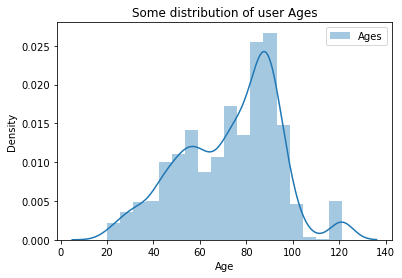

In [22]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
chart1 = sns.distplot(data3['Age'],label='Ages')
chart1.set_title('Some distribution of user Ages')
plt.legend()
plt.show()

All users'Gender?

In [23]:
data3.loc[data3['Gender2']=='F']# number of rows = Female number

,ExternalID,CleverCogsUserId,Gender2,DateOfBirth,Age,StaffPlanConditions,CareSysCondition
0,4703,685,F,1965/7/4,56.0,NaN,Spina Bifida
1,4704,772,F,1940/6/21,81.0,NaN,COPD
2,4706,1128,F,1931/2/25,90.0,NaN,Dementia
3,4707,1159,F,1982/9/18,39.0,NaN,Brain Injury
4,4708,784,F,1931/12/20,90.0,NaN,NaN
...,...,...,...,...,...,...,...
1300,9570,5633,F,1927/9/18,94.0,NaN,Elderly Care/Support
1302,9576,5643,F,1944/8/16,77.0,Stroke ...,NaN
1305,9582,5652,F,1942/1/26,79.0,NaN,NaN
1306,9586,5656,F,1932/4/9,89.0,Dementia ...,NaN


In [24]:
data3.loc[data3['Gender2']=='M'] # number of rows = Male number

,ExternalID,CleverCogsUserId,Gender2,DateOfBirth,Age,StaffPlanConditions,CareSysCondition
46,4759,1125,M,1936/9/3,85.0,NaN,Elderly Care/Support
47,4760,689,M,1979/7/15,42.0,NaN,Epilepsy
48,4762,1107,M,1925/1/12,96.0,NaN,NaN
49,4763,947,M,1956/4/16,65.0,NaN,Cerebral Palsy
50,4764,825,M,1933/6/11,88.0,NaN,Elderly Care/Support
...,...,...,...,...,...,...,...
1303,9578,5648,M,1947/8/13,74.0,NaN,Elderly Care/Support
1304,9579,5649,M,1990/9/14,31.0,NaN,Mental Health Issues
1307,9594,4060,M,1948/10/8,73.0,Multiple Sclerosis ...,NaN
1308,9600,5670,M,1952/11/2,69.0,NaN,NaN


## 5.3 How does the data relate to the questions that the data owner has discussed with you?

Data holder delievered 3 data sets whitch consists of basic user data and user usage data over a period of time. The dataset 3 specifically contains unique information about the user's age, health status, care services, etc.These data would help us to find new patterns of user behaviours under the epidemic period of time.

# 6.Data Visualization

6.1 The popularities of applications during the two epidemic periods：Statistics on users' usage of the various features of the product during the two periods of lockdown time.

Text(0.5, 1.0, 'The popularities of applications during the two epidemic periods')

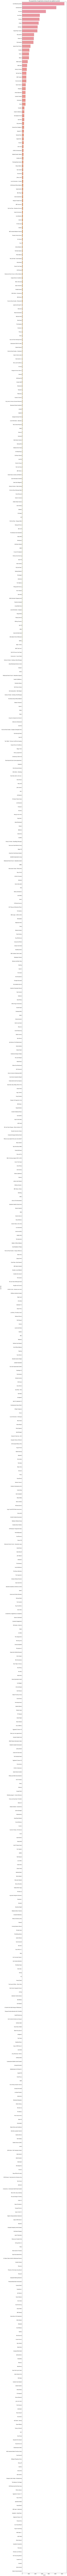

In [25]:
f, ax = plt.subplots(figsize=(10, 600)) #set the size of the background
chart=sns.countplot(y="Link Title" ,data=newdata1,order=newdata1['Link Title'].value_counts().index) 
                    #x, y, hue names of variables in data or vector data, optional
chart.set_title('The popularities of applications during the two epidemic periods')#set title

In this barchart, i can find that 'Entertainment' is the most frequently used module on product. Besides, come up with 'Card Matching Games','My care','Google','My music',etc.On the other hand, we can also find there are many modules that were visited almost only once in that period of time.

6.2 Total usage of different genders in the epidemic lockdown period

Text(0.5, 1.0, 'Total usage of different genders in the epidemic lockdown period')

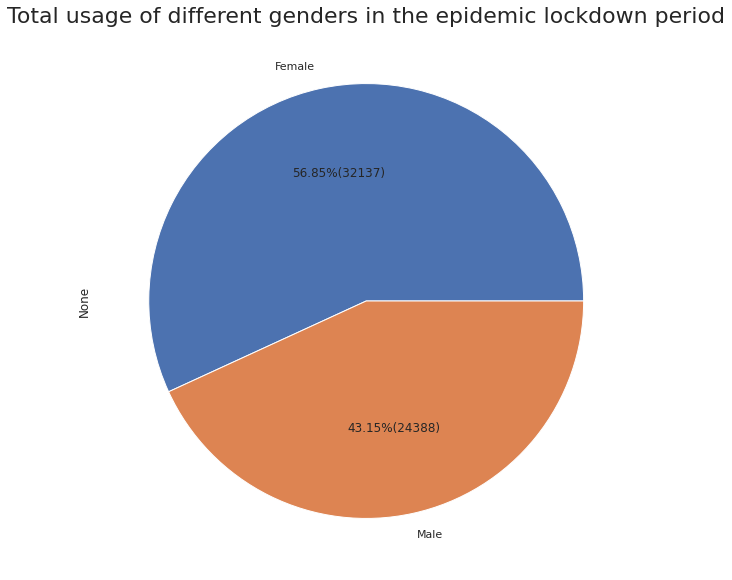

In [26]:
user_gender = newdata1.groupby('Gender1').size()
sns.set()
user_gender.plot(kind='pie',figsize=[10,10],autopct=lambda p:'{:.2f}%({:.0f})'
                 .format(p,(p/100)*user_gender.sum()))
plt.title('Total usage of different genders in the epidemic lockdown period', fontsize=22)#set title

From this pie chart, I can find that during the period of lockdown, women used more times of the product than men.

6.3 Ckick counts for different locations

Text(0.5, 1.0, 'Ckick counts for different locations')

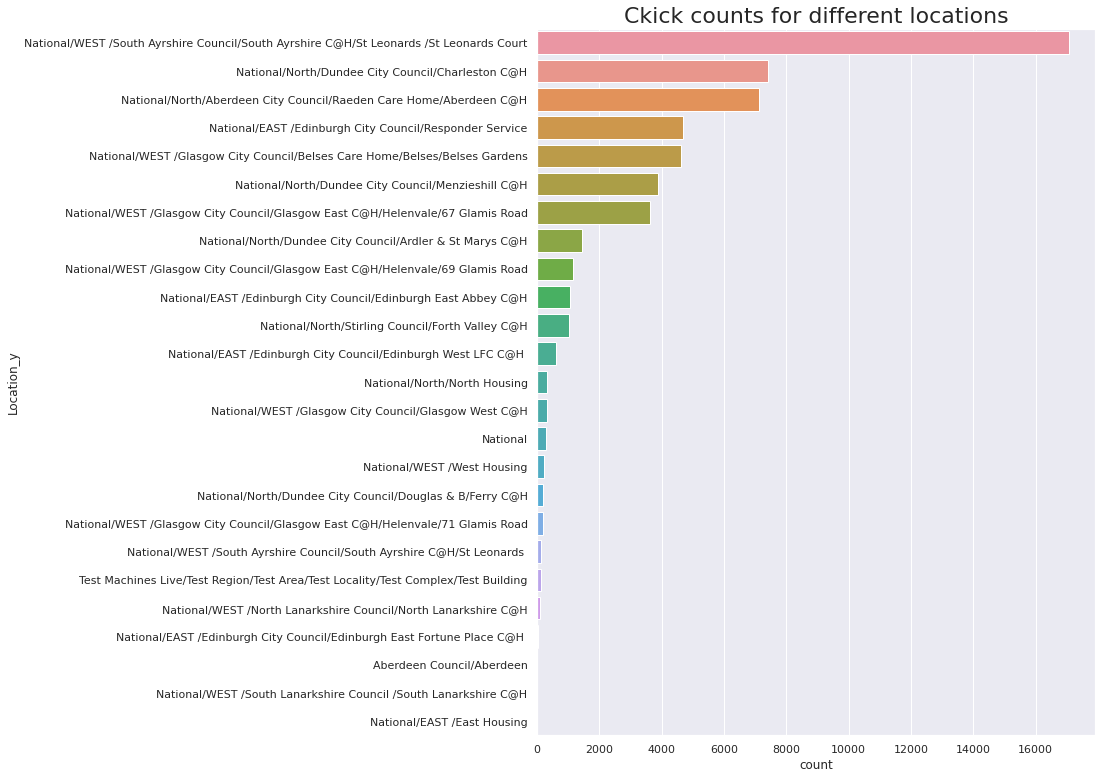

In [27]:
f, ax = plt.subplots(figsize=(10, 13))
chart=sns.countplot(y="Location_y", data=newdata1,order=newdata1['Location_y'].value_counts().index)
plt.title('Ckick counts for different locations', fontsize=22)#set title

From this bar chart, I found that St Leonards Court contributed the largest usage figure, nearly twice as large as the second place figure of Charleston C@H.

6.4 Gender & CareCondition

Text(0.5, 1.0, 'Gender & CareCondition')

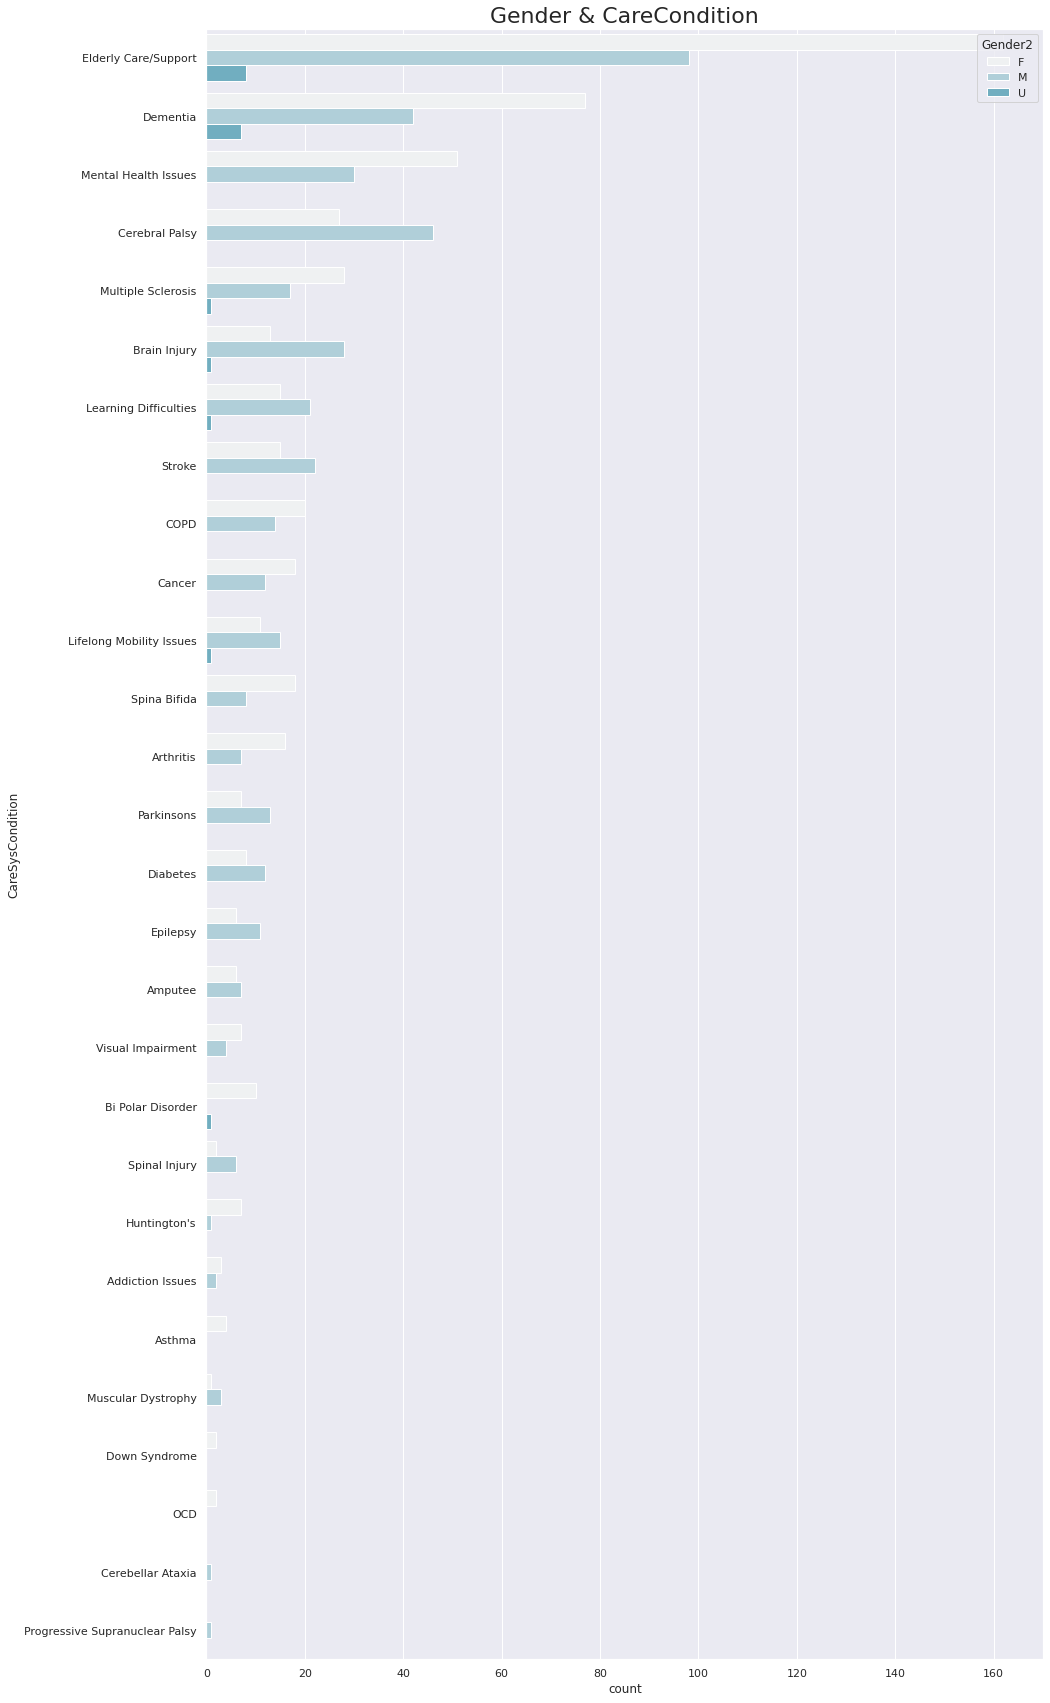

In [28]:
f, ax = plt.subplots(figsize=(15, 30))
sns.countplot(y='CareSysCondition',data=data3, color='c',hue='Gender2',order=data3['CareSysCondition'].value_counts().index)
plt.title('Gender & CareCondition', fontsize=22)#set title

From this bar chart, I can find users mostly suffered from what kind of sickness. And compare this with gender. I can find some medical conditions that have a strong relationship with gender. For example,In cases where we know that there are more female users than male, the number of male users with Cerebral Palsy is higher. This suggests that perhaps men are more susceptible to the disease.

6.5 relationships between variables analysed: Age & CareSystemCondition

Text(0.5, 1.0, 'Age & CareSysCondition')

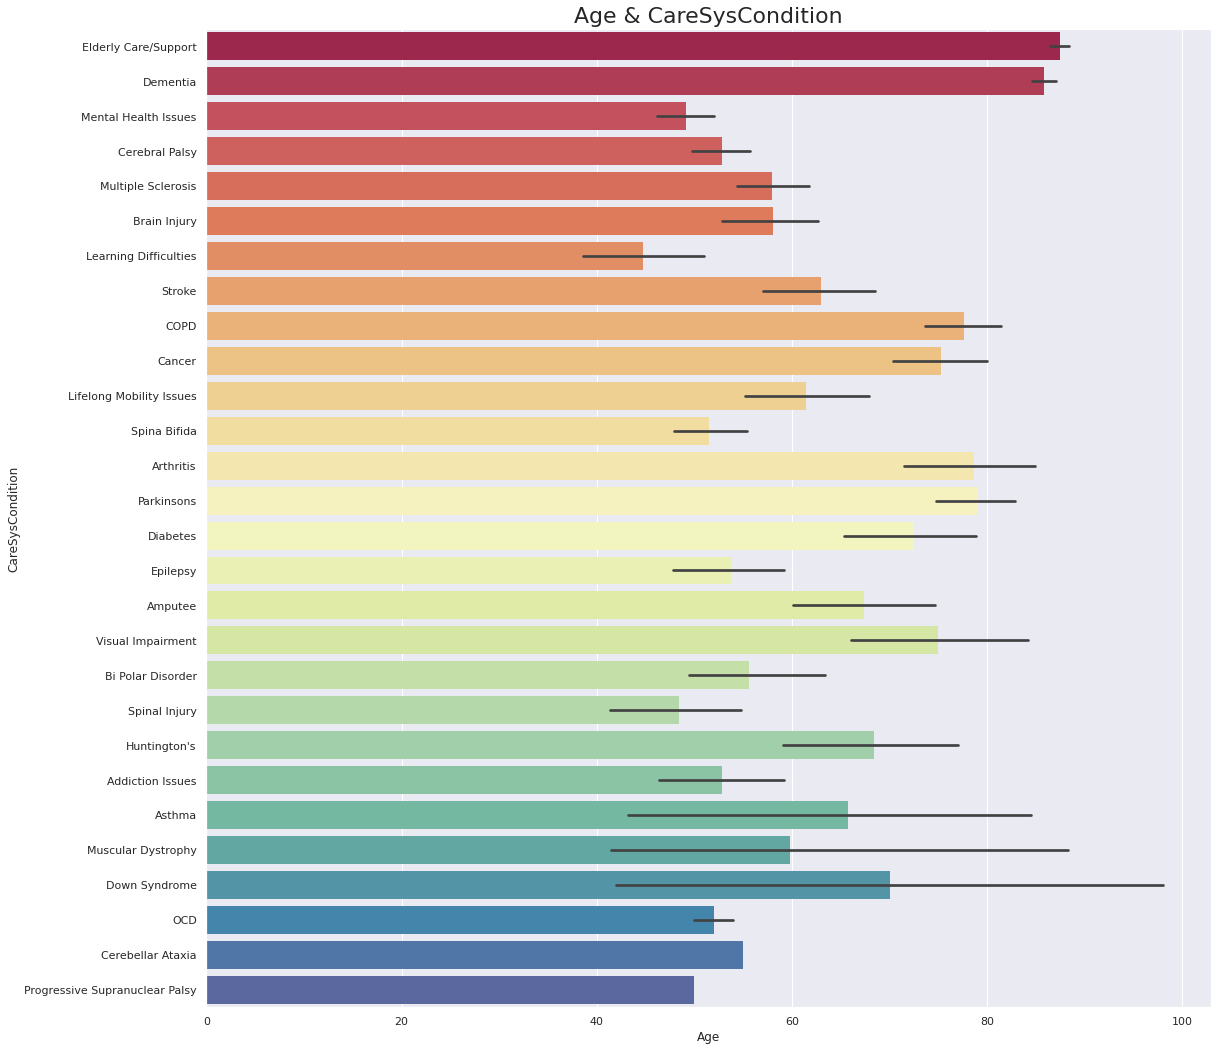

In [29]:
f, ax = plt.subplots(figsize=(18, 18))
#order, hue_orderlists of strings, optional
#Order to plot the categorical levels in, otherwise the levels are inferred from the data objects.
bar_plot = sns.barplot(x='Age', y='CareSysCondition',data=data3, order=data3['CareSysCondition'].value_counts().index, lw=0, palette="Spectral")
plt.title('Age & CareSysCondition', fontsize=22)#set title

From this chart, it is clear that some Care System Conditions are Age-related. In some cases, for example, those who need Elderly Care/Support are generally older and the age difference between them is small.In the case of Down Syndrome, for example, there is a wide range of ages, from 26 to 98 years old.

6.6 relationships between variables analysed: Age & CareSystemCondition

Text(0.5, 1.0, 'Age & Link Title & Gender')

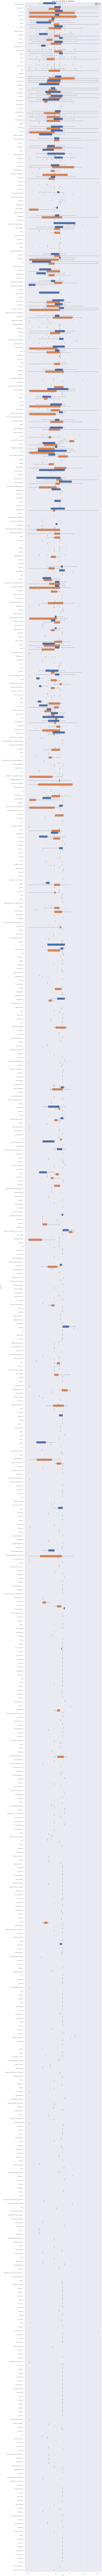

In [30]:
f, ax = plt.subplots(figsize=(18, 620))
chart=sns.boxplot(x='Age',y='Link Title',hue='Gender1',data=result,order=result['Link Title'].value_counts().index, width=1,saturation=75,whis=150)
sns.despine(offset=10,trim=True)
plt.legend()
plt.title('Age & Link Title & Gender', fontsize=22)#set title

This box plot allows me to analyse the relationship between user habits and user age under different genders separately.I found that for some applications on the product, women across multiple age dimensions have used them. For example: My care, Care Notes, My Home, My Care Team, Money Matters, while for male users, Google, Play games, Bubble Shooter (Tablet), Youtube, Word Search Games are more popular.Such a clear difference shows that the male and female user groups had very different habits and preferences during the two epidemic lock down periods.I believe that this may be the result of a long and differentiated gender education and the habits that users develop at a young age.

# 7 Reflect and Hypothesise

After collating and analysing the user data obtained from the data holder.I would like to make some Hypothesis and reflection based on comparisons and analyses corresponding to users' gender, preferences, age, Care System Condition, etc.1）In this elderly care facility, middle-aged and elderly women make up the majority. They do not use this product for entertainment, but prefer to use it as a communication tool to communicate and get in touch with health workers.2）During the lockdown period of time, some sports events like football may failed to be hold. So, many Male users had no other choices but to play more video games. 3)In the future, I would like to dig more by comparing time spent and chaneles&programmes. Then, I would come with more findings. 4)The data holder has provided almost two years of data.What I have analysed are only the time periods for lock down due to the epidemic law. The rest of the data was collated and analysed separately by my group members.Soon, I will be talking and sharing with them. After that, I will definitely be able to find out what impact the gloable pandemic has had on users' habits.
